### **2502009173 - SHAFA AMIRA QONITATIN**
**GSLC Session 9: Number 3 Equivalent**

#### **Import Librarires**

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

#### **Load Dataset**

In [2]:
df = pd.read_csv("scaled.csv")

In [3]:
df.head() # check if the dataset has been loaded and check the overall output

,Year,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
0,1.000000,0.544592,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.933333,0.447818,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0.866667,0.447818,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,0.800000,0.440228,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,0.733333,0.434535,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937


#### **Step 1: Split Dataset**
Split the dataset into 80% for train data and 20% for test data.

In [4]:
X = df.drop("Life.expectancy", axis=1) # independent variables
y = df["Life.expectancy"] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step 2: Create Model**
Initializes a random forest regressor object in Python using scikit-learn library

In [5]:
rf = RandomForestRegressor(random_state=42)

The random_state parameter sets a random seed to ensure that the random values generated by the model are reproducible. If the same seed is used, the model will produce the same results

#### **Step 3: Training Model**
Fits or training a random forest model using the training data

In [6]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### **Step 4: Get Feature Importances**
Calculates the feature importances of a random forest model

In [7]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importances)

HIV.AIDS                           0.594121
Adult.Mortality                    0.159651
Income.composition.of.resources    0.143005
Schooling                          0.018830
BMI                                0.014034
under.five.deaths                  0.010756
thinness.5.9.years                 0.008680
Alcohol                            0.007130
Year                               0.007001
thinness..1.19.years               0.005650
Total.expenditure                  0.005315
Measles                            0.003892
GDP                                0.003641
Polio                              0.003590
infant.deaths                      0.003420
percentage.expenditure             0.003385
Diphtheria                         0.003132
Population                         0.002891
Hepatitis.B                        0.001875
dtype: float64


Returns an array containing the importance value of each feature in the random forest model. The importance value represents the relative contribution of each feature in making accurate predictions. If variables with high scores are not used in our model, the results will change significantly, so it is important to know which variables contribute the most, which in this case are HIV.AIDS, Adult.Mortality, and Income.composition.of.resources.  

#### **Step 5: Predict Model using dataset test**
The trained model will make predictions using the test data

In [8]:
y_pred = rf.predict(X_test)

#### **Step 6: Results**
Create a data frame consisting of predicted value and ground truth

In [9]:
resultsRF = pd.DataFrame({"Predicted Value": y_pred, "Ground Truth": y_test})

In [10]:
resultsRF

,Predicted Value,Ground Truth
2546,0.698880,0.709677
650,0.754440,0.751423
1740,0.728330,0.719165
177,0.753966,0.768501
1377,0.323529,0.296015
...,...,...
859,0.410949,0.444023
1405,0.709848,0.705882
962,0.543188,0.470588
2658,0.654630,0.631879


#### **Step 7: Plot Predicted vs. Ground Truth Values**
Then, we plot the result using scatterplot

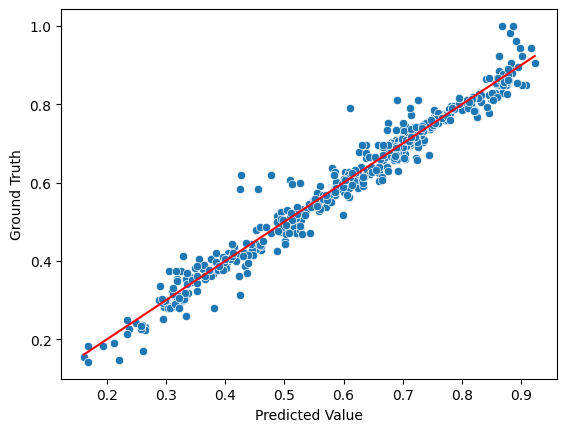

In [11]:
# create scatter plot
sns.scatterplot(x="Predicted Value", y="Ground Truth", data=resultsRF)

# add model line
sns.lineplot(x=resultsRF['Predicted Value'], y=resultsRF['Predicted Value'], color='red')

# set axis labels
plt.xlabel("Predicted Value")
plt.ylabel("Ground Truth")

# show plot
plt.show()

From the plot, we can see the distribution of data on the predicted value and ground truth and the line from our model, which is random forest. It can be seen that the distribution of the points is close to the line so this can be an indication of the good performance of the random forest model in predicting the target value. A linear pattern like the output above can also be assumed that there is a significant correlation between the predicted value and the ground truth and the random forest model has a good performance.


#### **Step 8: Calculate Mean Squared Error (MSE)**

In [12]:
MSE_RF = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE_RF)

Mean Squared Error:  0.000978457455815839


The Mean Squared Error result of 0.000978457455815839 shows that the random forest model that has been made has a good ability to predict the value of Life expectancy. The lower the MSE value, the smaller the difference between the actual value and the predicted value, so it can be concluded that the model has a high level of accuracy in predicting the value of Life expectancy.